# Titanic Data Analysis 

Analyze the open dataset with data on the passengers aboard the Titanic.
The data file for this analysis can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. 


In [2]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
%matplotlib inline

## First look at the data and attributes

In [3]:
df = pd.read_csv(r"C:\Users\6paan\Desktop\PROJECTS\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Getting description of the data attributes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df["Survived"].value_counts()
#342 people survived the Titanic, while 549 unfortunately did not

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df["Survived"].mean()
#the average amount of people that surivied was 0.38

0.3838383838383838

In [8]:
df["Survived"].groupby(df["Sex"]).mean().sort_values(ascending = False)
#females survived the Titanic at an high rate when compared to the males

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [9]:
Survivors_Gender=df["Survived"].groupby(df["Sex"]).sum().sort_values(ascending = False)
Survivors_Gender

Sex
female    233
male      109
Name: Survived, dtype: int64

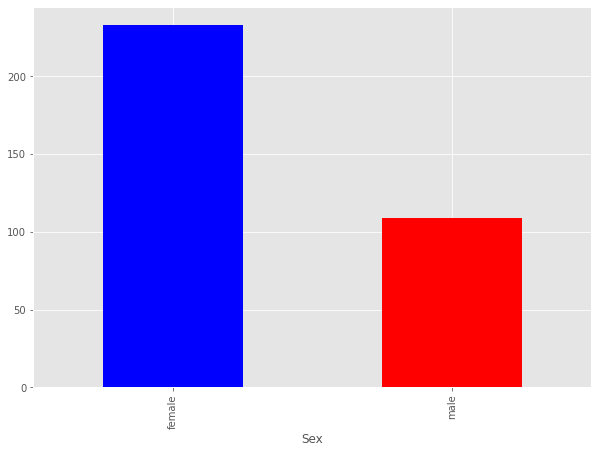

In [10]:
Survivors_Gender.plot(kind='bar', color = ("b","r"),figsize=(10, 7));

In [11]:
Survivors_Class = pd.crosstab(df['Survived'],df['Pclass'])
Survivors_Class

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


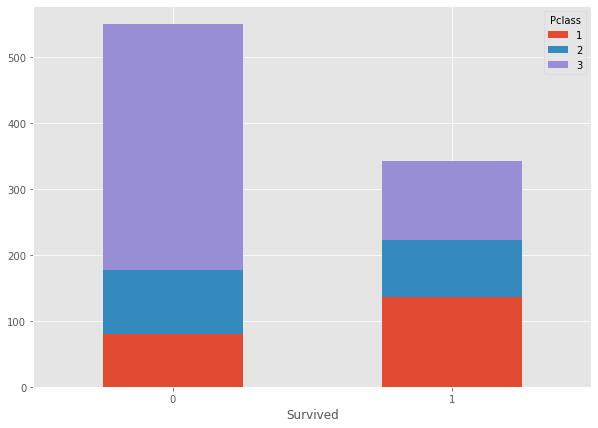

In [12]:
Survivors_Class.plot(kind='bar', stacked=True, rot = 0, figsize=(10, 7));

In [13]:
df["Survived"].groupby(df["Age"]).aggregate(sum).sort_values(ascending = False).head(10)
# most of the survivors are adults(18 and over) 

Age
24.0    15
22.0    11
36.0    11
35.0    11
27.0    11
30.0    10
18.0     9
19.0     9
32.0     9
29.0     8
Name: Survived, dtype: int64

<AxesSubplot:>

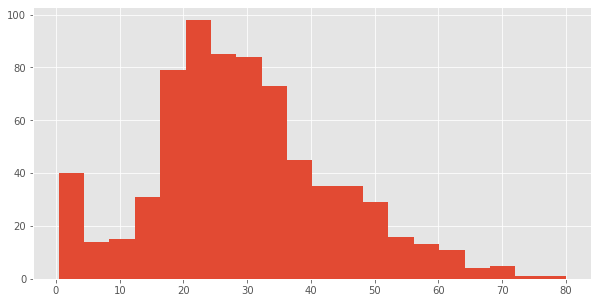

In [14]:
df.Age.hist(bins=20, figsize=(10, 5))

In [15]:
bins = [0,10,20,30,40,60,90]
bin_labels = ['0-9','10-19','20-29', '30-39', '40-59', '>60']

# We will create a new attribute `age_group`:
df['age_group'] = pd.cut(df.Age, bins, right=False, labels = bin_labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [16]:
df.age_group.value_counts().sort_index()

0-9       62
10-19    102
20-29    220
30-39    167
40-59    137
>60       26
Name: age_group, dtype: int64

In [17]:
# This will return the count and mean for each age group only for those passengers
# who survived, i.e. Survived == 1

age_analysis = df.groupby('age_group')['Survived'].agg(['sum', 'mean']).reset_index()
age_analysis

,age_group,sum,mean
0,0-9,38,0.612903
1,10-19,41,0.401961
2,20-29,77,0.350000
3,30-39,73,0.437126
4,40-59,54,0.394161
5,>60,7,0.269231


In [18]:
age_groups_per = pd.crosstab(index = df["Survived"], columns=[df["age_group"]], normalize='columns')*100
age_groups_per.round(2)

age_group,0-9,10-19,20-29,30-39,40-59,>60
Survived,,,,,,
0,38.71,59.8,65.0,56.29,60.58,73.08
1,61.29,40.2,35.0,43.71,39.42,26.92


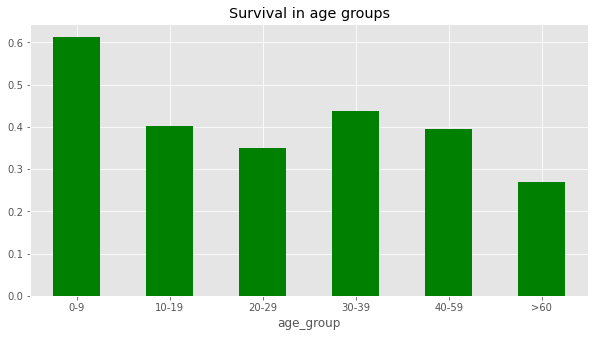

In [19]:
age_analysis.plot(x='age_group', y='mean', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Survival in age groups');